In [6]:
import pandas as pd
import numpy as np
filters = pd.read_csv('best_pictures/algos.csv',header=None)
filter1 = filters.iloc[0,:].values
filter2 = filters.iloc[1,:].values
filter1 = np.array(filter1).reshape(3, 3)
filter2 = np.array(filter2).reshape(3, 3)
filter3 = np.round(-0.6115*np.array([[-0.1908, -0.3967, -0.2294],
          [-0.3919, -0.8454, -0.4016],
          [-0.2346, -0.3960, -0.1857]]),4)

#filter3 = np.array([[0.1917, 0.1532, 0.1553],
#          [0.1548, 0.2057, 0.1407],
#          [0.1541, 0.1409, 0.2053]])

In [317]:
filter3=np.array([[-0.1382, -0.2805, -0.1430],
          [-0.2802, -0.5706, -0.2719],
          [-0.1432, -0.2717, -0.1464]])
filter3 = -0.891*filter3

In [329]:
filter3 = np.round(filter3,4)
filter3

array([[0.1231, 0.2499, 0.1274],
       [0.2497, 0.5084, 0.2423],
       [0.1276, 0.2421, 0.1304]])

In [330]:
# do not change the code in the block below
# __________start of block__________
import numpy as np
def compute_filters_two_loops(image,filter):

    height, width = image.shape


    res = np.zeros_like(image, dtype=np.float64)


    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=0)

    filter = filter.reshape(-1,9).T # YOUR CODE HERE



    for i in range(1, height + 1):
        for j in range(1, width + 1):
            res[i-1][j-1]=np.dot(padded_image[i-1:i+2, j-1:j+2].reshape(-1,9),filter)[0][0]
    return res

In [331]:
import cv2
import os
def load_images_from_folder(folder):
    images = []
    texts = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        if img is not None:
            filename = folder+'/'+filename[:-4]+'.txt'
            with open(filename, 'r') as f:
                text = np.array([[float(num) for num in line.split()] for line in f])
            images.append(img)
            texts.append(text)
            f.close()
    return [images, texts]

X,Y = load_images_from_folder("best_pictures")



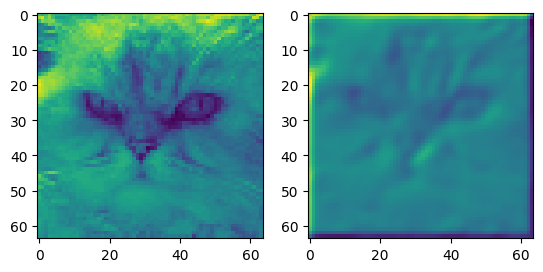

In [332]:
import matplotlib.pyplot as plt
image = X[0]


plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(Y[0])


In [333]:
f1 = compute_filters_two_loops(image,filter1)
f2 = compute_filters_two_loops(image,filter2)
f3 = compute_filters_two_loops(image,filter3)
f12 = compute_filters_two_loops(f1,filter2)
f13 = compute_filters_two_loops(f1,filter3)
f21 = compute_filters_two_loops(f2,filter1)
f23 = compute_filters_two_loops(f2,filter3)
f31 = compute_filters_two_loops(f3,filter1)
f32 = compute_filters_two_loops(f3,filter2)
f123 = compute_filters_two_loops(f12,filter3)
f132 = compute_filters_two_loops(f13,filter2)
f213 = compute_filters_two_loops(f21,filter3)
f231 = compute_filters_two_loops(f23,filter1)
f312 = compute_filters_two_loops(f31,filter2)
f321 = compute_filters_two_loops(f32,filter1)

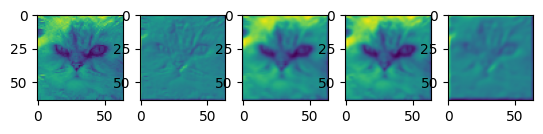

In [334]:
plt.subplot(1, 5, 1)
plt.imshow(image)
plt.subplot(1, 5, 2)
plt.imshow(f1)
plt.subplot(1, 5, 3)
plt.imshow(f2)
plt.subplot(1, 5, 4)
plt.imshow(f3)
plt.subplot(1, 5, 5)
plt.imshow(Y[0])


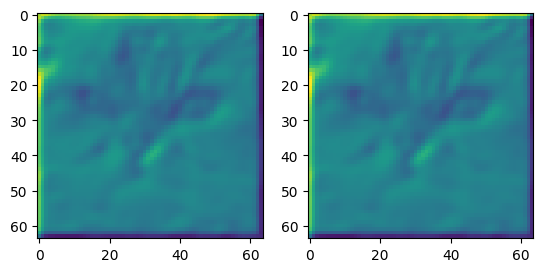

In [335]:
plt.subplot(1, 2, 1)
plt.imshow(f231)
plt.subplot(1, 2, 2)
plt.imshow(Y[0])

In [336]:
f231

array([[ 324.77974375,  364.41702188,  353.62634063, ...,  326.92612812,
         229.91947187,   33.56199687],
       [ 340.00843125,  287.75655625,  230.13179688, ...,  166.71877813,
          54.66045   , -134.32145625],
       [ 289.62311875,  188.2304    ,  114.02854687, ...,   55.91200625,
         -46.68623437, -208.01667187],
       ...,
       [ 228.0693    ,  131.54405625,   66.84550313, ...,   20.45316875,
         -33.40535937, -130.73063125],
       [ 158.19802187,   55.02864688,   -8.50874375, ...,  -30.8093    ,
         -69.40803125, -135.58326875],
       [  23.9158375 ,  -83.95751562, -142.0952375 , ..., -112.02591562,
        -124.38469688, -131.7629375 ]], shape=(64, 64))

In [337]:
Y[0]

array([[ 324.81640625,  364.234375  ,  353.43359375, ...,  326.73828125,
         229.59765625,   33.4296875 ],
       [ 339.8203125 ,  287.3828125 ,  229.90234375, ...,  166.51953125,
          54.49609375, -134.234375  ],
       [ 289.40234375,  188.03515625,  113.96484375, ...,   55.84765625,
         -46.609375  , -207.77734375],
       ...,
       [ 227.94921875,  131.46875   ,   66.82421875, ...,   20.4140625 ,
         -33.46484375, -130.69140625],
       [ 158.03125   ,   54.953125  ,   -8.49609375, ...,  -30.85546875,
         -69.5234375 , -135.56640625],
       [  23.84765625,  -83.91796875, -141.98828125, ..., -111.99609375,
        -124.3828125 , -131.65234375]], shape=(64, 64))

0.0027444873550533534


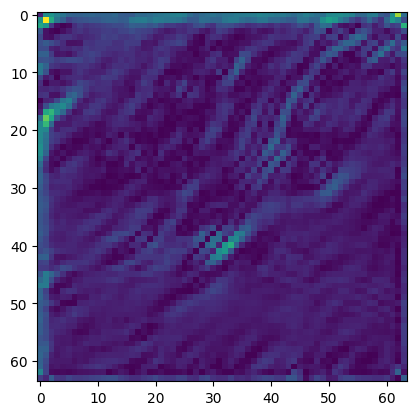

In [338]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(f231, Y[0])
print(mse)
plt.imshow(abs(Y[0]-f231))

In [339]:
k=0
mse=0
for i in image:
    f2 = compute_filters_two_loops(image,filter2)
    f23 = compute_filters_two_loops(f2,filter3)
    f231 = compute_filters_two_loops(f23,filter1)
    mse += mean_squared_error(f231, Y[k])
print(mse)



0.17564719072341478


### Решение через PyTorch

In [209]:
import torch
import torchvision
from IPython.display import clear_output
from matplotlib import pyplot as plt
from torch import nn
from torch.nn import functional as F
import time
from torch.utils.data import DataLoader, Dataset, Subset, TensorDataset
from sklearn.model_selection import train_test_split

In [210]:
# do not change the code in the block below
# __________start of block__________
device = (
    torch.device(f"cuda:{0}") if torch.cuda.is_available() else torch.device("cpu")
)
# __________end of block__________

In [211]:
# Creating model instance
default_dtype = torch.float32
model_task_1 = nn.Sequential(
    nn.Conv2d(1,1,3,padding=1, bias=False),
    nn.Conv2d(1,1,3,padding=1, bias=False),
)
model_task_1.to(device)

Sequential(
  (0): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
)

In [212]:
#X1 = []
#for image in X:
#    f2 = compute_filters_two_loops(image,filter2)
#    f21 = compute_filters_two_loops(f2,filter1)
#    X1.append([np.float32(f21)])

In [213]:
X,Y = load_images_from_folder("best_pictures")

In [214]:
X1 = []
for image in X:
    f2 = compute_filters_two_loops(image,filter2)
    X1.append([np.float32(f2)])

In [215]:
Y1 = []
for image in Y:
    Y1.append([np.float32(image)])

In [216]:
data = (X1,Y1)


In [217]:
train_x, test_x, train_y, test_y = train_test_split(data[0],data[1], test_size=0.03)
train_y= torch.tensor(train_y)
train_x = torch.tensor(train_x) 
train_tensor = TensorDataset(train_x, train_y) 
train_loader = DataLoader(dataset = train_tensor, batch_size = 64, shuffle = True)


test_y = torch.tensor(test_y)
test_x= torch.tensor(test_x) 
validation_tensor = TensorDataset(test_x, test_y) 
validation_loader = DataLoader(dataset = validation_tensor, batch_size = 64, shuffle = True)

In [218]:
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 1, 64, 64])
Labels batch shape: torch.Size([64, 1, 64, 64])


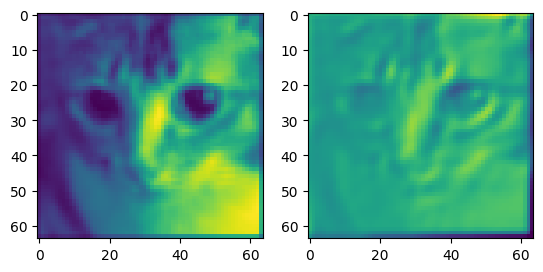

In [219]:
img = train_features[0].squeeze()
label = train_labels[0].squeeze()
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(label)

In [249]:
# your code here
def train_model(model,train_loader,val_loader,loss_fn,optimizer,epochs: int, device=device):
    losses_train = []
    losses_test = []
    acc = []
    for epoch in range(epochs):
        start_time = time.time()
        model.train(True)
        for X,Y in train_loader:
            Y = Y[0].reshape(-1,4096)
            X,Y = X.to(device), Y.to(device)
            output=model(X)
            output = output[0].reshape(-1,4096)
            loss=loss_fn(output, Y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            losses_train.append(loss.item())
        model.train(False)
        with torch.no_grad():
            for X,Y in val_loader:
                Y = Y[0].reshape(-1,4096)
                X,Y = X.to(device), Y.to(device)
                output=model(X)
                output = output[0].reshape(-1,4096)
                loss=loss_fn(output[0], Y)
                losses_test.append(loss.item())


        print(f'epoch {epoch+1}/{epochs}, {time.time()-start_time:.3f}s.')
        print(f'\t training loss: {losses_train[-1]:.6f}')
        print(f'\t validation loss: {losses_test[-1]:.6f}')

optimizer = torch.optim.Adam(model_task_1.parameters(), lr=3e-3)
epochs=1000
train_model(model_task_1, train_loader,validation_tensor,nn.MSELoss(),optimizer,epochs,device)

epoch 1/1000, 0.175s.
	 training loss: 2.763175
	 validation loss: 2.204717
epoch 2/1000, 0.120s.
	 training loss: 0.010138
	 validation loss: 0.144800
epoch 3/1000, 0.050s.
	 training loss: 0.164987
	 validation loss: 0.230753
epoch 4/1000, 0.050s.
	 training loss: 0.024873
	 validation loss: 0.006641
epoch 5/1000, 0.039s.
	 training loss: 0.004761
	 validation loss: 0.003957
epoch 6/1000, 0.062s.
	 training loss: 0.003344
	 validation loss: 0.000886
epoch 7/1000, 0.055s.
	 training loss: 0.048501
	 validation loss: 0.021384
epoch 8/1000, 0.049s.
	 training loss: 0.005001
	 validation loss: 0.005824
epoch 9/1000, 0.052s.
	 training loss: 0.006011
	 validation loss: 0.001359
epoch 10/1000, 0.049s.
	 training loss: 0.001383
	 validation loss: 0.000705
epoch 11/1000, 0.048s.
	 training loss: 0.000110
	 validation loss: 0.002334
epoch 12/1000, 0.045s.
	 training loss: 0.000573
	 validation loss: 0.000747
epoch 13/1000, 0.046s.
	 training loss: 0.001252
	 validation loss: 0.000805
epoch 14

In [250]:
model_task_1[0].weight

Parameter containing:
tensor([[[[-0.1382, -0.2805, -0.1430],
          [-0.2802, -0.5706, -0.2719],
          [-0.1432, -0.2717, -0.1464]]]], device='cuda:0', requires_grad=True)

In [254]:
model_task_1[1].weight

Parameter containing:
tensor([[[[ 0.9106,  0.4050,  0.0208],
          [ 0.4050, -0.3697, -0.4813],
          [ 0.0206, -0.4811, -0.8750]]]], device='cuda:0', requires_grad=True)

In [261]:
filter1

array([[-1. , -0.5,  0. ],
       [-0.5,  0.5,  0.5],
       [ 0. ,  0.5,  1. ]])

In [268]:
-1*np.array(filter1)/np.array([[ 0.9106,  0.4050,  0.0208],
          [ 0.4050, -0.3697, -0.4813],
          [ 0.0206, -0.4811, -0.8750]])

array([[ 1.09817703,  1.2345679 , -0.        ],
       [ 1.2345679 ,  1.35244793,  1.03885311],
       [-0.        ,  1.03928497,  1.14285714]])

In [213]:
filter2

array([[0.0625, 0.0625, 0.0625],
       [0.0625, 0.0625, 0.0625],
       [0.0625, 0.0625, 0.0625]])

In [ ]:
filter3 = np.round(-0.610655555*np.array([[-0.1908, -0.3967, -0.2294],
          [-0.3919, -0.8454, -0.4016],
          [-0.2346, -0.3960, -0.1857]]),4)

In [1062]:
np.round(filter3,4)

array([[0.1165, 0.2422, 0.1401],
       [0.2393, 0.5162, 0.2452],
       [0.1433, 0.2418, 0.1134]])